In [ ]:
!pip install --upgrade --force-reinstall numpy==1.26.4 pandas

  Using cached numpy-1.26.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 3.9 MB/s eta 0:00:00
Using cached numpy-1.26.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.0 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 125.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.9/229.9 kB 21.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 509.2/509.2 kB 39.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.8/347.8 kB 32.7 MB/s eta 0:00:00
  Attempting uninstall: pytz
    Found existing installation: pytz 2025.2
    Uninstalling pytz-2025.2:
      Successfully uninstalled pytz-2025.2
  Attempting uninstall: tzdata
    Found existing installation: tzdata 2025.2
    Uninstalling tzdata-2025.2:
      Successfully uninstalled tzdata-2025.2
  Attempting uninstall: six
    Found existing installation: six 1.17.0
    Uninstalling six-1.1

In [ ]:
# 기본 패키지
!pip install -q scikit-learn matplotlib tqdm
!pip install -q gensim
!pip install -q torch torchvision torchaudio
!pip install -q transformers pillow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.6/26.6 MB 53.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 66.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.2/38.2 MB 17.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9

1) 데이터 로드

In [ ]:
import pandas as pd

product_df = pd.read_csv("/content/drive/MyDrive/sales/product.csv")
review_img_path = pd.read_csv("/content/drive/MyDrive/sales/review_image_path.csv")
reviews_df = pd.read_csv("/content/drive/MyDrive/sales/reviews.csv")

print("product.csv:", product_df.shape)
print("review_image_path.csv:", review_img_path.shape)
print("reviews.csv:", reviews_df.shape)
product_df.head()

product.csv: (2752, 13)
review_image_path.csv: (9444, 4)
reviews.csv: (6764, 97)


,product_id,name,brand,category_l1,gender,price,views_1m,sales_cum,hearts,reviews_count,rating_avg,main_image,image_files
0,3175071,로고 오가닉 코튼 맨투맨 - 블루 / S50GU0209S25570469,메종 마르지엘라,상의/스웨트,M,334990,2600,30,444,7,5.0,3175071_1,"[""3175071_1"", ""3175071_2"", ""3175071_3"", ""31750..."
1,5276013,상의,트릴리온,상의/스웨트,UNISEX,39800,20000,400,5,13,4.6,5276013_1,"[""5276013_1"", ""5276013_2"", ""5276013_3"", ""52760..."
2,4280990,빅 트위치 로고 맨투맨 네이비,리,상의/스웨트,UNISEX,55300,8200,400,1900,54,4.8,4280990_1,"[""4280990_1"", ""4280990_2"", ""4280990_3"", ""42809..."
3,4480414,볼드 폭스 헤드 패치 레귤러 맨투맨 - 블랙 / MM00815KT1036P199,메종 키츠네,상의/스웨트,M,209990,2000,100,5,10,4.9,4480414_1,"[""4480414_1"", ""4480414_2"", ""4480414_3"", ""44804..."
4,4699878,CGP 스몰 스퀘어 로고 스트라이프 럭비 맨투맨_브라운,코드그라피,상의/스웨트,F,71100,30,400,5,64,4.8,4699878_1,"[""4699878_1"", ""4699878_2"", ""4699878_3"", ""46998..."


2) 이미지 압축 해제

In [ ]:
import zipfile, os

with zipfile.ZipFile("/content/drive/MyDrive/sales/review_images.zip", "r") as zip_ref:
    zip_ref.extractall("/content")  # 최상위에 풀기

IMG_DIR = "/content//review_images"  # 실제 이미지 폴더 경로
print("이미지 개수:", len(os.listdir(IMG_DIR)))


이미지 개수: 9448


3) 이미지 임베딩 (ResNet18, 512차원)

In [ ]:
import torch
from torchvision import models, transforms
from torch.utils.data import Dataset, DataLoader
from PIL import Image, UnidentifiedImageError

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225]),
])

class ReviewImageDataset(Dataset):
    def __init__(self, df, img_dir):
        self.df = df
        self.img_dir = img_dir
    def __len__(self): return len(self.df)
    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        path = os.path.join(self.img_dir, row["image_name"])
        try:
            img = Image.open(path).convert("RGB")
            img = transform(img)
        except (UnidentifiedImageError, FileNotFoundError):
            img = torch.zeros(3,224,224)
        return img, row["product_id"], row["image_name"]

resnet = models.resnet18(weights=models.ResNet18_Weights.DEFAULT)
resnet.fc = torch.nn.Identity()   # 마지막 FC 레이어 제거
resnet = resnet.to(device).eval()

ds = ReviewImageDataset(review_img_path, IMG_DIR)
dl = DataLoader(ds, batch_size=64, shuffle=False)

img_embs = []
with torch.no_grad():
    for imgs, pids, fns in dl:
        feats = resnet(imgs.to(device)).cpu().numpy()
        for pid, fn, fv in zip(pids, fns, feats):
            img_embs.append({
                "product_id": pid,
                "image_name": fn,
                **{f"img_{i}": fv[i] for i in range(len(fv))}
            })

img_emb_df = pd.DataFrame(img_embs)
print("이미지 임베딩:", img_emb_df.shape)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


100%|██████████| 44.7M/44.7M [00:00<00:00, 117MB/s]


이미지 임베딩: (9444, 514)


4) 텍스트 임베딩 (리뷰 텍스트 → Word2Vec 평균)

In [ ]:
from gensim.models import Word2Vec
import re
import numpy as np


# 1. 토크나이저
def tokenize(text):
    if pd.isna(text):
        return []
    return re.findall(r"[가-힣a-zA-Z0-9]+", str(text).lower())

reviews_df["tokens"] = reviews_df["text"].apply(tokenize)


# 2. Word2Vec 학습
sentences = reviews_df["tokens"].tolist()
w2v = Word2Vec(
    sentences=sentences,
    vector_size=100,
    window=5,
    min_count=1,
    sg=1,         # Skip-gram
    workers=4,
    seed=42
)

# 3. 문장 벡터 생성 함수
def sent_vec(tokens):
    vecs = [w2v.wv[t] for t in tokens if t in w2v.wv]
    if len(vecs) == 0:
        return None   # 텍스트 없으면 제외
    return np.mean(vecs, axis=0)


# 4. product_id별 임베딩 생성
txt_rows = []
for _, r in reviews_df[["product_id","tokens"]].iterrows():
    v = sent_vec(r["tokens"])
    if v is None:   # 텍스트 없는 상품은 skip
        continue
    row = {"product_id": r["product_id"]}
    row.update({f"txt_{i}": v[i] for i in range(len(v))})
    txt_rows.append(row)

txt_emb_df = pd.DataFrame(txt_rows).drop_duplicates("product_id")
print("텍스트 임베딩:", txt_emb_df.shape)
txt_emb_df.head()


텍스트 임베딩: (1061, 101)


,product_id,txt_0,txt_1,txt_2,txt_3,txt_4,txt_5,txt_6,txt_7,txt_8,...,txt_90,txt_91,txt_92,txt_93,txt_94,txt_95,txt_96,txt_97,txt_98,txt_99
0,3175071,0.099973,0.043183,-0.072899,-0.053356,-0.109013,0.106536,0.265771,0.084839,-0.233179,...,-0.115368,0.331103,0.075887,-0.150320,0.157267,-0.195812,-0.008237,0.247748,-0.116169,0.000778
2,5276013,0.121350,0.018308,-0.017631,-0.002167,-0.110087,0.095664,0.252739,0.070627,-0.212052,...,-0.078018,0.291390,0.080307,-0.114498,0.133260,-0.205849,-0.001113,0.207461,-0.095031,0.010984
8,4280990,0.149716,0.053674,-0.040210,-0.093362,-0.178448,0.118964,0.379104,0.084926,-0.332730,...,-0.115904,0.406950,0.127724,-0.177581,0.158199,-0.304212,0.021874,0.348102,-0.118286,0.024850
16,4480414,0.134349,0.006490,0.002744,0.003243,-0.139660,0.084190,0.271218,0.058953,-0.235264,...,-0.080829,0.313846,0.094364,-0.095656,0.129623,-0.222841,0.018346,0.239462,-0.100277,0.022141
17,4699878,0.137019,0.034110,-0.033343,-0.023306,-0.136460,0.125353,0.311233,0.089407,-0.268964,...,-0.112930,0.364214,0.105494,-0.156350,0.165294,-0.254705,0.007384,0.271450,-0.114146,0.012009


5) 멀티모달 결합

In [ ]:
# 이미지 + 텍스트 둘 다 있는 상품만
merged = (
    product_df
    .merge(img_emb_df, on="product_id", how="inner")
    .merge(txt_emb_df, on="product_id", how="inner")
)

print("멀티모달 데이터셋:", merged.shape)
merged.head()

멀티모달 데이터셋: (20024, 626)


,product_id,name,brand,category_l1,gender,price,views_1m,sales_cum,hearts,reviews_count,...,txt_90,txt_91,txt_92,txt_93,txt_94,txt_95,txt_96,txt_97,txt_98,txt_99
0,3175071,로고 오가닉 코튼 맨투맨 - 블루 / S50GU0209S25570469,메종 마르지엘라,상의/스웨트,M,334990,2600,30,444,7,...,-0.115368,0.331103,0.075887,-0.150320,0.157267,-0.195812,-0.008237,0.247748,-0.116169,0.000778
1,3175071,로고 오가닉 코튼 맨투맨 - 블루 / S50GU0209S25570469,메종 마르지엘라,상의/스웨트,M,334990,2600,30,444,7,...,-0.115368,0.331103,0.075887,-0.150320,0.157267,-0.195812,-0.008237,0.247748,-0.116169,0.000778
2,3175071,로고 오가닉 코튼 맨투맨 - 블루 / S50GU0209S25570469,메종 마르지엘라,상의/스웨트,M,334990,2600,30,444,7,...,-0.115368,0.331103,0.075887,-0.150320,0.157267,-0.195812,-0.008237,0.247748,-0.116169,0.000778
3,3175071,로고 오가닉 코튼 맨투맨 - 블루 / S50GU0209S25570469,메종 마르지엘라,상의/스웨트,M,334990,2600,30,444,7,...,-0.115368,0.331103,0.075887,-0.150320,0.157267,-0.195812,-0.008237,0.247748,-0.116169,0.000778
4,5276013,상의,트릴리온,상의/스웨트,UNISEX,39800,20000,400,5,13,...,-0.078018,0.291390,0.080307,-0.114498,0.133260,-0.205849,-0.001113,0.207461,-0.095031,0.010984


6) 멀티모달 어텐션 모델 (판매량 예측)

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

# 1. Feature 준비
img_cols = [c for c in merged.columns if c.startswith("img_")]
txt_cols = [c for c in merged.columns if c.startswith("txt_")]
meta_cols = ["price", "views_1m", "hearts", "reviews_count"]

X_img = merged[img_cols].values.astype(np.float32)
X_txt = merged[txt_cols].values.astype(np.float32)

# 메타데이터 스케일링
scaler = StandardScaler()
X_meta = scaler.fit_transform(merged[meta_cols].values.astype(np.float32))

# 모든 피처 합치기
X = np.hstack([X_img, X_txt, X_meta])

# 타깃 (로그 변환)
y = np.log1p(merged["sales_cum"].values.astype(np.float32))


# 2. Train/Test Split
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2, random_state=42)


# 3. XGBoost 모델 학습
model_xgb = xgb.XGBRegressor(
    tree_method="hist",     # 빠른 트리 분할
    n_estimators=100,       # 트리 개수
    learning_rate=0.05,     # 학습률
    max_depth=6,            # 트리 깊이
    subsample=0.8,          # 데이터 샘플링
    colsample_bytree=0.8,   # 피처 샘플링
    random_state=42,
    n_jobs=-1
)

model_xgb.fit(X_tr, y_tr)

# 4. 예측 & 평가
y_pred = model_xgb.predict(X_te)

# 로그 되돌리기
y_true = np.expm1(y_te)
y_pred_exp = np.expm1(y_pred)

mae = mean_absolute_error(y_true, y_pred_exp)
r2  = r2_score(y_true, y_pred_exp)

print("🔥XGBoost 결과")
print(f"MAE: {mae:.2f}")
print(f"R² : {r2:.4f}")


🔥XGBoost 결과
MAE: 565.31
R² : 0.9481


7) 테스트


In [ ]:
def quick_test_xgb(model, X_te, y_te, n=5):
    """
    XGBoost 모델 예측을 빠르게 확인하는 함수
    model : 학습된 XGBRegressor
    X_te  : 테스트 피처
    y_te  : 테스트 타깃 (로그 변환된 값)
    n     : 출력할 샘플 개수
    """
    # 예측
    y_pred = model.predict(X_te)

    # 로그 되돌리기
    y_true = np.expm1(y_te)
    y_pred_exp = np.expm1(y_pred)

    # 샘플 비교 출력
    sample_idx = np.random.choice(len(y_true), n, replace=False)
    print("\n🔥샘플 예측 결과 (XGBoost)")
    for i in sample_idx:
        print(f"[샘플 {i}] 실제: {y_true[i]:.0f} | 예측: {y_pred_exp[i]:.0f}")

    return y_true, y_pred_exp


In [ ]:
# 6. 테스트 실행
y_true, y_pred = quick_test_xgb(model_xgb, X_te, y_te, n=10)


🔥샘플 예측 결과 (XGBoost)
[샘플 1594] 실제: 500 | 예측: 485
[샘플 2546] 실제: 5400 | 예측: 4975
[샘플 3879] 실제: 1500 | 예측: 603
[샘플 3650] 실제: 1700 | 예측: 1444
[샘플 2747] 실제: 200 | 예측: 172
[샘플 3200] 실제: 1400 | 예측: 1233
[샘플 2070] 실제: 400 | 예측: 331
[샘플 2380] 실제: 200 | 예측: 228
[샘플 2886] 실제: 4300 | 예측: 1232
[샘플 1914] 실제: 13000 | 예측: 12950


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54032 (\N{HANGUL SYLLABLE PAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/us

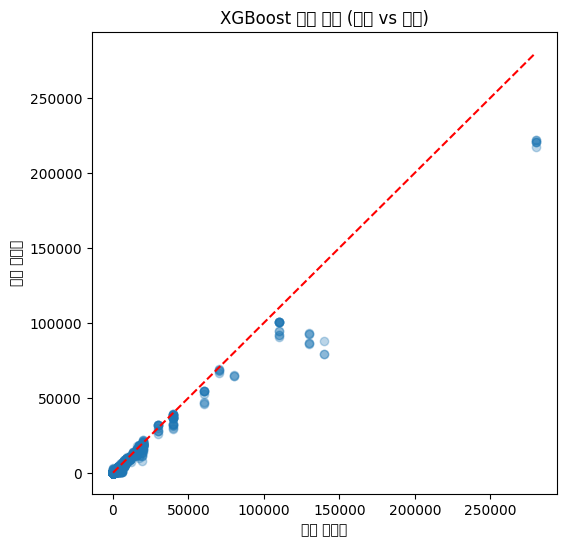

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_true, y_pred, alpha=0.3)
plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], 'r--')
plt.xlabel("실제 판매량")
plt.ylabel("예측 판매량")
plt.title("XGBoost 예측 결과 (실제 vs 예측)")
plt.show()
